In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from dateutil.parser import parse
pd.options.display.max_columns = 130

In [106]:
df1 = pd.read_csv('data_ejep/propostas/arquivo_final.csv')
df2 = pd.read_csv('data_ejep/precificacao/df_2013_clean.csv', encoding='ISO-8859-1')
df3 = pd.read_csv('data_ejep/precificacao/df_2014_5_6.csv', encoding='ISO-8859-1')
df4 = pd.read_csv('data_ejep/precificacao/df_2017_8.csv', encoding='ISO-8859-1')
df5 = pd.read_csv('data_ejep/membros/all_members.csv', encoding='UTF-8')
df6 = pd.read_csv('data_ejep/propostas/arquivo_final1.csv')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,6,24,25,26,27,35,38,40,41,42,43,44,45,46,47,48,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Tratando precificação 2017/2018

In [107]:
dates = df4['data'].astype(np.int64)
dates = dates.apply(lambda x: pd.datetime.fromordinal(datetime(1900, 1, 1).toordinal() + x - 2))
df4['data'] = dates

In [108]:
df4['Ano'] = df4['data'].astype(str).apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
df4['Mes'] = df4['data'].astype(str).apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
df4['Sem'] = df4['Mes'].apply(lambda x: 1 if x<7 else 7)

In [ ]:
df5 = df5.rename(columns={'Nome completo':'Nome_completo'})
df5['Ano'] = df5['date_now'].astype(str).apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
df5['Mes'] = df5['date_now'].astype(str).apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)

In [138]:
df2 = df2.drop('Unnamed: 0', axis=1 )
df3 = df3.drop('Unnamed: 0', axis=1 )

KeyError: "['Unnamed: 0'] not found in axis"

### dfx = junção de precificação 2017/2018 com membros pelo nome do vendedor

In [123]:
dfx = pd.merge(df4,df5, on = "Nome_completo", how='outer')
dfx = dfx.rename({'data':'data_venda','date_now':'data_membro'}, axis=1)

In [126]:
dfx = dfx[dfx['Ano_x'] == dfx['Ano_y']]
dfx['Ano'] = dfx['Ano_y']
dfx = dfx[dfx['Sem'] == dfx['Mes_y']]

In [127]:
dfx = dfx.drop(['Unnamed: 0_x','Unnamed: 0_y', 'Mes_y','Ano_x', 'Ano_y','key'], axis=1)

In [128]:
dfx.head()

,Path,Nome,Apelido,vendedor,data_venda,distancia,unidade_tempo,tempo,cst_1,cst2,cst3,cst4,cst5,horas_cst1,horas_cst2,horas_cst3,horas_cst4,horas_cst5,tipo_projeto,area,detalhe,perspectiva_recompra,oportunidade,risco,porte,tipo_empresa,markup,preço,Nome_completo,Mes_x,Sem,Área,Cargo,Gmail,Data_de_nascimento,Engª Produção,data_membro,Localizacao,date_UFSC,date_EJEP,Ano
0,.\Em processo de venda\Açaí II - Gestão de Est...,Frutos de Goiás,Açaí II,Bello,2017-04-25,9.0,Por Semanas,14.0,Interno,Externo,Externo,NaN,NaN,15.0,15.0,10.0,NaN,NaN,Consultoria,Logística,Não Necessário,Médio,Médio,Baixo,Médio,Comércio/Serviço,0.5245,10000.0,Lucas Siqueira Bello,4.0,1.0,PJT,Gerente,lucassiqueirabello@gmail.com,1996-12-11,Mecânica,2017-01-01,Córrego Grande,2015-01-01,2016-01-01,2017.0
3,.\Não Vendidas\RH - Pesquisa de Mercado\Precif...,Pessoa Física (Thiago),RH,Bello,2017-05-10,10.0,Por Semanas,8.0,Interno,Externo,NaN,NaN,NaN,15.0,20.0,NaN,NaN,NaN,Consultoria,Análise de Viabilidade,Não Necessário,Baixo,Alto,Baixo,Baixo,Comércio/Serviço,0.4440,5000.0,Lucas Siqueira Bello,5.0,1.0,PJT,Gerente,lucassiqueirabello@gmail.com,1996-12-11,Mecânica,2017-01-01,Córrego Grande,2015-01-01,2016-01-01,2017.0
10,.\Em processo de venda\Favorável - MP-Melhoria...,Eco Construtora Favaretto,Favorável,Yuri,2017-03-30,1.0,Por Semanas,11.0,Interno,Interno,Trainee,NaN,NaN,20.0,20.0,20.0,NaN,NaN,Consultoria,MP,Melhoria de Processo,Baixo,Médio,Médio,Baixo,Comércio/Serviço,0.4090,5010,Yuri Boing,3.0,1.0,ADM,Gerente,yuriboing4@gmail.com,1996-10-31,Elétrica,2017-01-01,Jurere,2015-01-01,2016-01-01,2017.0
14,.\Em processo de venda\Diabetes - Análise de v...,-,diabetes,yuri,2017-05-18,10.0,Por Semanas,5.0,Interno,Externo,NaN,NaN,NaN,20.0,20.0,NaN,NaN,NaN,Consultoria,SAG,Não Necessário,Baixo,Baixo,Baixo,Baixo,Indústria,0.4000,2600.0,Yuri Boing,5.0,1.0,ADM,Gerente,yuriboing4@gmail.com,1996-10-31,Elétrica,2017-01-01,Jurere,2015-01-01,2016-01-01,2017.0
18,.\Em processo de venda\Golfe - Layout (MP)\MP\...,-,diabetes,yuri,2017-05-18,1.0,Por Semanas,1.0,Interno,Externo,Externo,NaN,NaN,130.0,220.0,220.0,NaN,NaN,Consultoria,MP,Estado Atual,Muito Alto,Médio,Baixo,Baixo,Indústria,0.4000,8100.0,Yuri Boing,5.0,1.0,ADM,Gerente,yuriboing4@gmail.com,1996-10-31,Elétrica,2017-01-01,Jurere,2015-01-01,2016-01-01,2017.0


### merged_prec = todas as precificações juntas + membros dataset

In [139]:
merged_prec = pd.concat([df2,df3,dfx])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [147]:
merged_prec.shape

(211, 42)

In [185]:
merged_prec.Ano.value_counts()

2017.0    103
2016.0     29
2014.0     27
2013.0     21
2018.0     18
2015.0     13
Name: Ano, dtype: int64

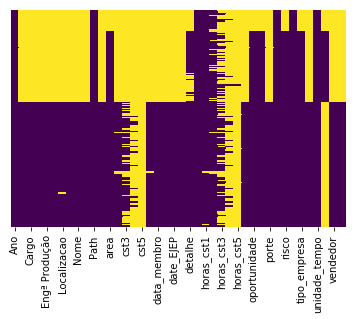

In [146]:
figsize=(10,30)
sns.heatmap(merged_prec.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [215]:
test = merged_prec.dropna(thresh=8)

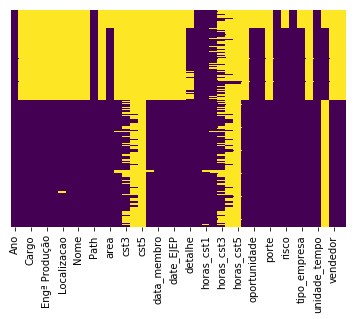

In [216]:
figsize=(10,30)
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [217]:
test.shape

(208, 42)

In [214]:
test.Ano.value_counts()

2017.0    103
2016.0     29
2014.0     27
2018.0     18
2015.0     13
2013.0      4
Name: Ano, dtype: int64

In [ ]:
# não deu certo

In [7]:
def getdir_gabi(path):
    try: 
        paths = []
        direc = path
        while direc != '':
            direc = os.path.split(path)[0]
            #print(direc)
            direc2 = os.path.split(path)[1]
            print(direc2)
            paths.append(direc2)
            path = direc
    except:
            return np.nan
    return paths

In [12]:
df2['Path'].apply(getdir_gabi)[0]

.\Não vendidas\Calha - Layout\Precificação.Calha.xlsx
.\Não vendidas\Camaleão - 5s e MP\Planilha de Precificacao 2013_Camaleão.xlsx
.\Não vendidas\Chuva - Qualidade\Planilha de Precificacao chuva.xlsx
.\Não vendidas\Comunicação V\Planilha Precificação Intelbras.xlsx
.\Vendidas\Bobina - TRF\Vendas\Planilha de Precificacao BOBINA.xlsx
.\Vendidas\Cerâmica - PCP\Vendas\Planilha de Precificacao - Cerâmica.xlsx
.\Vendidas\Christmas - MP e PCP\Vendas\Planilha de Precificacao Christmas 2013.xlsx
.\Vendidas\Churrasco - PE\Vendas\Precificação Churrasco.xlsx
.\Vendidas\Compras II - PE, MP e Sistema de Custos\Vendas\Planilha de Precificacao - Compras 2.xlsx
.\Vendidas\Comunicação VI - MFV\Vendas\Planilha de Precificacao Intelbras Tiago 2013.1 2.xlsx
.\Vendidas\Construção V - MP\Vendas\Planilha de Precificacao - Construção V  (última proposta).xlsx
.\Vendidas\Creme I - MFV e TRF\Vendas\Planilha de Precificacao 2013 - creme - MFV.xlsx
.\Vendidas\Creme I - MFV e TRF\Vendas\Planilha de Precificacao 20

['.\\Não vendidas\\Calha - Layout\\Precificação.Calha.xlsx']